**Group Members**

1. Kornkamol Rodpunya 6310412002

2. Wanida Sitthipaeng 6310412011

3. Amara Kaweekate 6310412014

# **Load Dependencies**

In [ ]:
!pip install pycaret

In [ ]:
import pandas as pd
from pycaret.clustering import *

# **Load Data**

In [ ]:
df = pd.read_csv('Supermarket Data.csv')

In [ ]:
df['SHOP_DATE'] = df['SHOP_DATE'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

In [ ]:
df.tail(5)

SHOP_WEEK  SHOP_DATE  SHOP_WEEKDAY  SHOP_HOUR  QUANTITY  SPEND  \
956569     200617 2006-06-22             5         12         3   3.96   
956570     200633 2006-10-13             6         20         3   3.96   
956571     200617 2006-06-22             5         18         3   3.96   
956572     200619 2006-07-06             5         19         3   3.96   
956573     200635 2006-10-23             2         21         3   3.96   

         PROD_CODE PROD_CODE_10 PROD_CODE_20 PROD_CODE_30 PROD_CODE_40  \
956569  PRD0904997      CL00074     DEP00021       G00007       D00002   
956570  PRD0904997      CL00074     DEP00021       G00007       D00002   
956571  PRD0904997      CL00074     DEP00021       G00007       D00002   
956572  PRD0904997      CL00074     DEP00021       G00007       D00002   
956573  PRD0904997      CL00074     DEP00021       G00007       D00002   

             CUST_CODE CUST_PRICE_SENSITIVITY CUST_LIFESTAGE        BASKET_ID  \
956569             NaN                    NaN            NaN  994101100088778   
956570             NaN                    NaN            NaN  994102700099738   
956571  CUST0000544241                     LA             YA  994101100506174   
956572  CUST0000423155                     LA             YF  994101300433650   
956573             NaN                    NaN            NaN  994102900104676   

       BASKET_SIZE BASKET_PRICE_SENSITIVITY BASKET_TYPE  \
956569           M                       MM      Top Up   
956570           L                       LA      Top Up   
956571           L                       LA      Top Up   
956572           L                       LA   Full Shop   
956573           L                       MM      Top Up   

       BASKET_DOMINANT_MISSION  STORE_CODE STORE_FORMAT STORE_REGION  
956569                   Fresh  STORE00002           LS          W01  
956570                   Fresh  STORE00002           LS          W01  
956571                   Fresh  STORE00002           LS          W01  
956572                   Fresh  STORE00002           LS          W01  
956573                   Fresh  STORE00002           LS          W01

In [ ]:
df.info

<bound method DataFrame.info of         SHOP_WEEK  SHOP_DATE  SHOP_WEEKDAY  SHOP_HOUR  QUANTITY  SPEND  \
0          200732 2007-10-05             6         17         3   6.75   
1          200733 2007-10-10             4         20         3   6.75   
2          200741 2007-12-09             1         11         1   2.25   
3          200731 2007-09-29             7         17         1   2.25   
4          200737 2007-11-10             7         14         3   6.75   
...           ...        ...           ...        ...       ...    ...   
956569     200617 2006-06-22             5         12         3   3.96   
956570     200633 2006-10-13             6         20         3   3.96   
956571     200617 2006-06-22             5         18         3   3.96   
956572     200619 2006-07-06             5         19         3   3.96   
956573     200635 2006-10-23             2         21         3   3.96   

         PROD_CODE PROD_CODE_10 PROD_CODE_20 PROD_CODE_30 PROD_CODE_40  \
0    

# **Prepare customer single view**

# Define features

Total visits = COUNT(DISTINCT BASKET ID)

Ticket size = SUM(SPEND)/COUNT(DISTINCT BASKET ID)

Total no. of SKUs

TotalQuantity = SUM(QUANTITY)

avg_Quantity_per_TotalVisit = SUM(QUANTITY)/COUNT(DISTINCT BASKET ID)




# Calculate features

In [ ]:
##prepare customer single view
df_csv = df_groupby = df[df['CUST_CODE'].notnull()].groupby(by=['CUST_CODE']).agg(TotalSpend=('SPEND', 'sum'),
                                                                                  TotalVisits=('BASKET_ID', 'nunique'),
                                                                                  TotalSKUs=('PROD_CODE', 'nunique'),                                                                                  
                                                                                  FirstDate=('SHOP_DATE', 'min'),                                                                        
                                                                                  LastDate=('SHOP_DATE', 'max'),
                                                                                  TotalQuantity=('QUANTITY', 'sum'),
                                                                                  ).reset_index()

In [ ]:
##calculate ticket size
df_csv['TicketSize'] = df_csv['TotalSpend']/df_csv['TotalVisits']

In [ ]:
##find max date in the dataset
max_date = df_csv['LastDate'].max()

In [ ]:
##calculate total days of the relationship
df_csv['total_days'] = (df_csv['LastDate'] - df_csv['FirstDate']).dt.days + 1

In [ ]:
##calculate recency days
df_csv['recency'] = (max_date - df_csv['LastDate']).dt.days

In [ ]:
df_csv['avg_Quantity_per_TotalVisit'] = (df_csv['TotalQuantity']/df_csv['TotalVisits'])

In [ ]:
df_csv.head(10)

CUST_CODE  TotalSpend  TotalVisits  TotalSKUs  FirstDate   LastDate  \
0  CUST0000000181        2.44            1          1 2007-01-06 2007-01-06   
1  CUST0000000369      959.33          220        189 2006-04-16 2008-07-05   
2  CUST0000000689      328.57           16        116 2007-07-22 2008-06-23   
3  CUST0000000998        5.95            3          4 2006-05-04 2006-07-07   
4  CUST0000001163       39.74            4         24 2006-10-22 2008-06-22   
5  CUST0000001194     2493.83          103        403 2006-04-22 2008-06-20   
6  CUST0000002257        1.99            1          1 2006-07-21 2006-07-21   
7  CUST0000002499        0.34            1          1 2006-04-14 2006-04-14   
8  CUST0000002605        1.80            6          1 2006-10-08 2008-06-12   
9  CUST0000002637      124.63           15         53 2006-08-03 2008-05-30   

   TotalQuantity  TicketSize  total_days  recency  avg_Quantity_per_TotalVisit  
0              1    2.440000           1      547                     1.000000  
1            923    4.360591         812        1                     4.195455  
2            334   20.535625         338       13                    20.875000  
3              6    1.983333          65      730                     2.000000  
4             34    9.935000         610       14                     8.500000  
5           1705   24.211942         791       16                    16.553398  
6              1    1.990000           1      716                     1.000000  
7              1    0.340000           1      814                     1.000000  
8              6    0.300000         614       24                     1.000000  
9            126    8.308667         667       37                     8.400000

# **Cluster customers**

In [ ]:
exp_clu = setup(data=df_csv, ignore_features=['CUST_CODE','FirstDate', 'LastDate'], normalize=True)

Description                 Value
0                               session_id                  2541
1                            Original Data            (6100, 11)
2                           Missing Values                 False
3                         Numeric Features                     8
4                     Categorical Features                     0
5                         Ordinal Features                 False
6                High Cardinality Features                 False
7                  High Cardinality Method                  None
8                         Transformed Data             (6100, 8)
9                                 CPU Jobs                    -1
10                                 Use GPU                 False
11                          Log Experiment                 False
12                         Experiment Name  cluster-default-name
13                                     USI                  23ba
14                         Imputation Type                simple
15          Iterative Imputation Iteration                  None
16                         Numeric Imputer                  mean
17      Iterative Imputation Numeric Model                  None
18                     Categorical Imputer                  mode
19  Iterative Imputation Categorical Model                  None
20           Unknown Categoricals Handling        least_frequent
21                               Normalize                  True
22                        Normalize Method                zscore
23                          Transformation                 False
24                   Transformation Method                  None
25                                     PCA                 False
26                              PCA Method                  None
27                          PCA Components                  None
28                     Ignore Low Variance                 False
29                     Combine Rare Levels                 False
30                    Rare Level Threshold                  None
31                         Numeric Binning                 False
32                         Remove Outliers                 False
33                      Outliers Threshold                  None
34                Remove Multicollinearity                 False
35             Multicollinearity Threshold                  None
36             Remove Perfect Collinearity                 False
37                              Clustering                 False
38                    Clustering Iteration                  None
39                     Polynomial Features                 False
40                       Polynomial Degree                  None
41                    Trignometry Features                 False
42                    Polynomial Threshold                  None
43                          Group Features                 False
44                       Feature Selection                 False
45                Feature Selection Method               classic
46            Features Selection Threshold                  None
47                     Feature Interaction                 False
48                           Feature Ratio                 False
49                   Interaction Threshold                  None

In [ ]:
models()

Name                                          Reference
ID                                                                                            
kmeans                   K-Means Clustering                     sklearn.cluster._kmeans.KMeans
ap                     Affinity Propagation  sklearn.cluster._affinity_propagation.Affinity...
meanshift             Mean Shift Clustering              sklearn.cluster._mean_shift.MeanShift
sc                      Spectral Clustering       sklearn.cluster._spectral.SpectralClustering
hclust             Agglomerative Clustering  sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan     Density-Based Spatial Clustering                     sklearn.cluster._dbscan.DBSCAN
optics                    OPTICS Clustering                     sklearn.cluster._optics.OPTICS
birch                      Birch Clustering                       sklearn.cluster._birch.Birch
kmodes                   K-Modes Clustering                               kmodes.kmodes.KModes

In [ ]:
get_metrics()

Name       Display Name  ... Needs Ground Truth Custom
ID                                                 ...                          
silhouette          Silhouette         Silhouette  ...              False  False
chs          Calinski-Harabasz  Calinski-Harabasz  ...              False  False
db              Davies-Bouldin     Davies-Bouldin  ...              False  False
hs           Homogeneity Score        Homogeneity  ...               True  False
ari                 Rand Index         Rand Index  ...               True  False
cs          Completeness Score       Completeness  ...               True  False

[6 rows x 9 columns]

# Compare model performance

In [ ]:
metrics = []
for model in models().index:
    if model in ['meanshift', 'optics']:
        continue
    create_model(model)
    metric_result = pull()
    metric_result['model'] = model
    metrics.append(metric_result)

Silhouette  Calinski-Harabasz  ...  Rand Index  Completeness
0     -0.1801           128.5356  ...           0             0

[1 rows x 6 columns]

In [ ]:
cluster_metrics = pd.concat(metrics)
cluster_metrics.set_index("model", inplace=True)
cluster_metrics.sort_values(by='Silhouette', ascending=False, inplace=True)
cluster_metrics.style.highlight_max(subset=['Silhouette', 'Calinski-Harabasz'], color = 'green', axis = 0).highlight_min(subset=['Davies-Bouldin'], color = 'green', axis = 0)

# Spectral Clustering Clustering

In [ ]:
sc = create_model('sc')

Silhouette  Calinski-Harabasz  ...  Rand Index  Completeness
0      0.9159           186.2397  ...           0             0

[1 rows x 6 columns]

In [ ]:
plot_model(sc)

# KMeans Clustering

In [ ]:
kmeans = create_model('kmeans')

Silhouette  Calinski-Harabasz  ...  Rand Index  Completeness
0      0.4097          3504.4535  ...           0             0

[1 rows x 6 columns]

In [ ]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=2541, tol=0.0001, verbose=0)


In [ ]:
plot_model(kmeans)

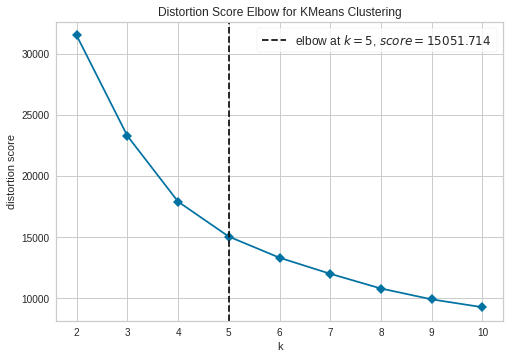

In [ ]:
plot_model(kmeans, plot = 'elbow')

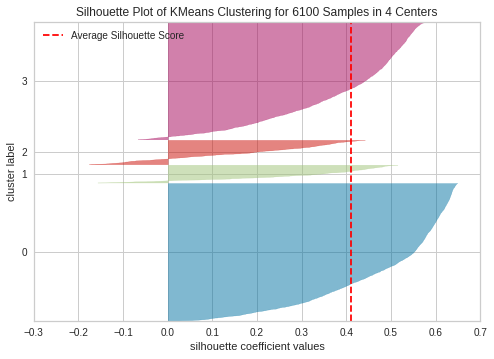

In [ ]:
plot_model(kmeans, plot = 'silhouette')

## https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

# **Interpret results and plan for actions**

In [ ]:
kmeans_results = assign_model(kmeans)
kmeans_results.head(5)

CUST_CODE  TotalSpend  ...  avg_Quantity_per_TotalVisit    Cluster
0  CUST0000000181        2.44  ...                     1.000000  Cluster 0
1  CUST0000000369      959.33  ...                     4.195455  Cluster 1
2  CUST0000000689      328.57  ...                    20.875000  Cluster 2
3  CUST0000000998        5.95  ...                     2.000000  Cluster 0
4  CUST0000001163       39.74  ...                     8.500000  Cluster 3

[5 rows x 12 columns]

In [ ]:
kmeans_results.to_csv(r'kmeans_results', index = False, header=True)

In [ ]:
plot_model(kmeans, plot = 'distribution')

In [ ]:
plot_model(kmeans, plot = 'distribution', feature = 'TotalSpend')

In [ ]:
plot_model(kmeans, plot = 'distribution', feature = 'TotalVisits')

In [ ]:
plot_model(kmeans, plot = 'distribution', feature = 'TotalSKUs')

In [ ]:
plot_model(kmeans, plot = 'distribution', feature = 'TotalQuantity')

In [ ]:
plot_model(kmeans, plot = 'distribution', feature = 'TicketSize')

In [ ]:
plot_model(kmeans, plot = 'distribution', feature = 'avg_Quantity_per_TotalVisit')

In [ ]:
plot_model(kmeans, plot = 'distribution', feature = 'recency')